<a href="https://colab.research.google.com/github/Kuemwoisuk/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_4%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 오픈소스 기반 데이터 분석 4강 - 데이터 수집


## 4-1 CSV 파일 읽기

In [ ]:
import pandas as pd

## data.csv 파일 읽기

print(df)

## 4-2 JSON 파일 읽기



In [ ]:
import json
import pandas as pd

## data.json 파일 출력

## data.json 파일 DataFrame 읽기

print(df)

## 4-3 텍스트 파일 읽기 및 데이터 추출

In [ ]:
import re

## 파일(callcenter20250301.log) 오픈 및 읽기
with open('callcenter20250301.log', 'r', encoding='utf-8') as f:
    content = f.read()
## 주민등록번호 패턴 생성

## 주민등록번호 마스킹


## 마스킹된 파일(callcenter20250301_masked.log) 오픈 및 쓰기


print("주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.")

## 4-4 Open-Meteo의 무료 날씨 API를 통한 특정 지역 온도 조회

In [ ]:
import requests
import json

url = "https://api.open-meteo.com/v1/forecast?=&=&current=temperature_2m"
params = {
    "latitude": "37.58638333",
    "longitude": "127.0203333",
    "current": "temperature_2m"
}

try:
    ## URL 및 파라미터 전송
    response = requests.get(url, params = params)
    response.raise_for_status()
    ## JSON 데이터 읽기
    data = response.json()
    print("API 응답:", data)
    print("서울시 종로구의 현재 온도는 : {0}{1} 입니다.".format(data['current']['temperature_2m'], data['current_units']['temperature_2m']))

except requests.exceptions.RequestException as e:
    print(f"API 호출 실패: {e}")
except json.JSONDecodeError as e:
    print(f"JSON 파싱 실패: {e}")

## 4-5 Selenium과 lxml을 이용한 웹 스크래핑

In [ ]:
!curl -o google-chrome-stable_current_amd64.deb https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!apt install ./google-chrome-stable_current_amd64.deb -y
!pip install selenium webdriver_manager

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from lxml import html
import time

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')               # 브라우저 창 없이 실행
chrome_options.add_argument('--no-sandbox')             # 보안모드 비활성화 (Colab 필수)
chrome_options.add_argument('--disable-dev-shm-usage')  # 메모리 부족 방지 (Colab 필수)
chrome_options.add_argument('--window-size=1920x1080')  # 창 크기 설정(가상)
chrome_options.add_argument('--disable-gpu')            # GPU 가속 비활성화 (일부 환경 안정성)
chrome_options.binary_location = "/usr/bin/google-chrome-stable"  # Colab용 크롬 경로 지정

## 드라이버 실행
driver = webdriver.Chrome(options=chrome_options)

## 사이트 접속


## 사이트 접속 대기


## 페이지 제목 출력


## 드라이버 종료
driver.quit()


# 실습 시나리오

## 공공데이터 포털 가입 및 데이터 신청

- [https://www.data.go.kr](https://www.data.go.kr)
- 한국환경공단 에어코리아 대기오염정보 데이터 신청

In [ ]:
import requests

## 데이터 수집 url 및 api key 설정


params = {
    'serviceKey': api_key,
    'returnType': 'json',
    'numOfRows': '100',
    'pageNo': '1',
    'sidoName': '서울',
    'ver': '1.0'
}

## 데이터 수집

## 호출 성공/실패 출력



In [7]:
import requests
import time
import pandas as pd

api_key = '59675046706f75743536774378766f'

parmas = {
    'Key': api_key,
    'Type': 'json',
    'service':'energyUseDataSummaryInfo',
    'start_index': '1',
    'end_index': '1000',
    'year':'2015',
    'month': '01',
    'use_type': '개인',
}

energy_type = ['전기', '가스', '수도', '지역난방']

def fetch_data(api_key, year, month, start_index, end_index):
  url = 'http://openapi.seoul.go.kr:8088/59675046706f75743536774378766f/json/energyUseDataSummaryInfo/1/1000/2015/01/개인/energy_type'
  response = requests.get(url)
  return response.json()

all_data = []

for year in range(2015, 2025):
  for month in range(1, 13):
    month_str = f"{month:02d}"
    start_index = 1
    end_index = 1000
    while True:
      data = fetch_data(year, month_str, energy_type, start_index, end_index)
      rows = data['energyUseDataSummaryInfo']['row']
      if not rows:
         break
      all_data.extend(rows)
      start_index += 1000
      end_index += 1000
      time.sleep(0.2)
  print(f"총 {len(all_data)}개의 데이터를 수집했습니다.")


KeyboardInterrupt: 

In [19]:
import time, requests
import pandas as pd
import json
import pprint

items = []
data = []

api_Key = '59675046706f75743536774378766f'

for year in range(2015, 2025):
    for month in range(1, 13):
        url=f'http://openapi.seoul.go.kr:8088/{api_Key}/json/energyUseDataSummaryInfo/1/5/{year}/{month:02d}'

        response = requests.get(url)

        if response.status_code == 200:
          ##  print(f"API 호출 성공: {year}, {month}")
            items.append(response.json()['energyUseDataSummaryInfo']['row'])
            time.sleep(1)
        else:
            print(f"API 호출 실패: {year}, {month}")
            time.sleep(1)


# JSON 파싱
resp_json = response.json()
# row 리스트 얻기
items = resp_json.get('energyUseDataSummaryInfo', {}).get('row', [])

data = []  # 결과 저장할 리스트

for i in items:


   if i.get('MM_TYPE') == '개인':
        # YEAR, MON, EUS 등 정보 출력 (디버그용)
        print(i.get('YEAR'), i.get('MON'))
        # append 할 때 필요한 값들을 리스트 형태로 추가
        data.append([
            i.get('YEAR'),
            i.get('MON'),
            i.get('EUS'),
            i.get('GUS'),
            i.get('WUS'),
            i.get('HUS')
        ])

df = pd.DataFrame(data, columns=['YEAR', 'MON', 'EUS', 'GUS', 'WUS', 'HUS'])

print(df)

MM_TYPE: 공동주택관리소 YEAR: 2024 MON: 12
MM_TYPE: 기업 YEAR: 2024 MON: 12
MM_TYPE: 개인 YEAR: 2024 MON: 12
2024 12
MM_TYPE: 공공기관 YEAR: 2024 MON: 12
MM_TYPE: 학교 YEAR: 2024 MON: 12
   YEAR MON        EUS       GUS        WUS          HUS
0  2024  12  134828126  42103424  7326853.6  1513199.277


In [21]:
import time
import requests
import pandas as pd
import json
import pprint

api_Key = '59675046706f75743536774378766f'

data = []  # 결과 저장할 리스트

for year in range(2015, 2025):
    for month in range(1, 13):
        url = f'http://openapi.seoul.go.kr:8088/{api_Key}/json/energyUseDataSummaryInfo/1/1000/{year}/{month:02d}'

        response = requests.get(url)
        if response.status_code == 200:
            resp_json = response.json()
            # row 리스트 얻기
            items = resp_json.get('energyUseDataSummaryInfo', {}).get('row', [])


            if isinstance(items, list):
                for i in items:

                    if i.get('MM_TYPE') == '개인':
                        data.append([
                            i.get('YEAR'),
                            i.get('MON'),
                            i.get('EUS'),
                            i.get('GUS'),
                            i.get('WUS'),
                            i.get('HUS')
                        ])
            else:
                # 만약 items가 딕셔너리 등 다른 구조라면 그 구조에 맞게 처리
                # 예: items가 dict 안에 또 리스트 형태면
                # nested = items.get('someKey', [])
                # 반복 처리 등
                pass

            time.sleep(1)  # 호출 간 인터벌 조정
        else:
            print(f"API 호출 실패: {year}-{month:02d}, 상태코드={response.status_code}")
            time.sleep(1)

# DataFrame 생성
df = pd.DataFrame(data, columns=['YEAR', 'MON', 'EUS', 'GUS', 'WUS', 'HUS'])
print(df)


     YEAR MON        EUS       GUS           WUS           HUS
0    2015  01  193784708  59133720  12819757.886  22740838.937
1    2015  02  189974230  56487358  12656888.218  18793320.213
2    2015  03  175215719  49984873  12655474.249  13826348.508
3    2015  04  183891769  37306841  12954773.246   5836002.885
4    2015  05  177289769  22060892  13086734.214   1320895.801
..    ...  ..        ...       ...           ...           ...
115  2024  08  463971328   7072251    15873544.6    130082.263
116  2024  09  409872908   5729131    15143321.6   3420507.136
117  2024  10  282268119   8233421    15297669.9   2695491.396
118  2024  11  257927956  17418221    14678672.5   8836296.454
119  2024  12  134828126  42103424     7326853.6   1513199.277

[120 rows x 6 columns]


In [24]:
import pandas as pd

##계절 컬럼 추가
def month_to_season(month):
    if 3 <= month <= 5:
        return '봄'
    elif 6 <= month <= 8:
        return '여름'
    elif 9 <= month <= 11:
        return '가을'
    else:
        # 12,1,2 → 겨울
        return '겨울'

df['season'] = df['MON'].apply(month_to_season)

# 연도 컬럼 복제 또는 이름 변경
df['year'] = df['YEAR']

print(df.head())



   YEAR  MON        EUS         GUS           WUS           HUS season  year
0  2015    1  193784708  59133720.0  1.281976e+07  2.274084e+07     겨울  2015
1  2015    2  189974230  56487358.0  1.265689e+07  1.879332e+07     겨울  2015
2  2015    3  175215719  49984873.0  1.265547e+07  1.382635e+07      봄  2015
3  2015    4  183891769  37306841.0  1.295477e+07  5.836003e+06      봄  2015
4  2015    5  177289769  22060892.0  1.308673e+07  1.320896e+06      봄  2015


/tmp/ipython-input-2752522731.py:29: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.savefig('energy_trend_7280.png', dpi=300)
/tmp/ipython-input-2752522731.py:29: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.savefig('energy_trend_7280.png', dpi=300)
/tmp/ipython-input-2752522731.py:29: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.savefig('energy_trend_7280.png', dpi=300)
/tmp/ipython-input-2752522731.py:29: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.savefig('energy_trend_7280.png', dpi=300)
/tmp/ipython-input-2752522731.py:29: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) DejaVu Sans.
  plt.savefig('energy_trend_7280.png', dpi=300)
/tmp/ipython-input-2752522731.py:29: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.savefig('energy_trend_7

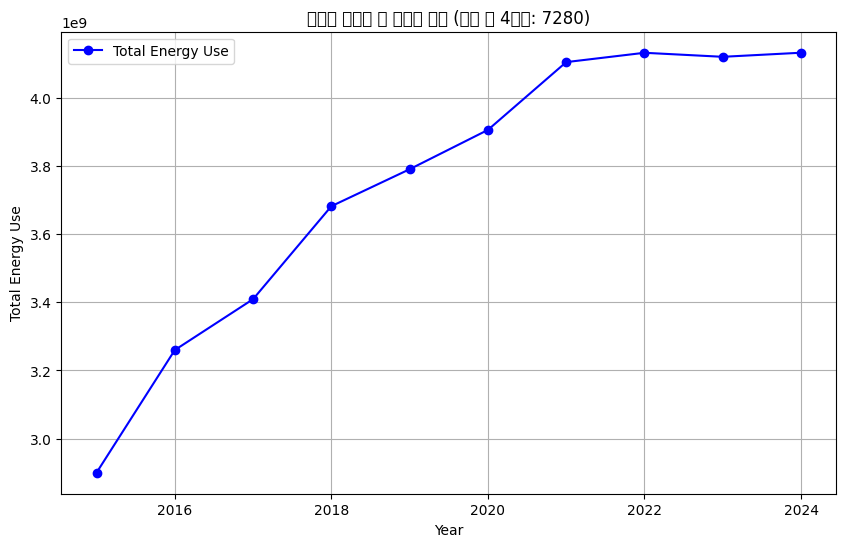

In [36]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# 폰트 경로 (윈도우)
font_path = r"C:\Windows\Fonts\malgun.ttf"  # 또는 실제 너의 PC에 있는 폰트 파일명

# 폰트 프로퍼티 얻기
font_prop = fm.FontProperties(fname=font_path).get_name()

# 설정 적용
plt.rc('font', family=font_prop)
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

cols = ['EUS', 'GUS', 'WUS', 'HUS']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 총 사용량 계산
df['TOTAL'] = df['EUS'] + df['GUS'] + df['WUS'] + df['HUS']
# 연도별 총합 계산
annual_sum = df.groupby('YEAR', as_index=False)['TOTAL'].sum()
# 변화량 계산
annual_sum['CHANGE'] = annual_sum['TOTAL'].diff()
# 선 그래프 시각화
plt.figure(figsize=(10,6))
plt.plot(annual_sum['YEAR'], annual_sum['TOTAL'], marker='o', linestyle='-', color='blue', label='Total Energy Use')
plt.xlabel('Year')
plt.ylabel('Total Energy Use')
plt.title('연도별 에너지 총 사용량 변화 (학번 뒤 4자리: 7280)')
plt.legend()
plt.grid(True)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# 그래프 저장
plt.savefig('energy_trend_7280.png', dpi=300)
plt.show()


/tmp/ipython-input-4264548670.py:33: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.savefig('energy_trend_1234.png', dpi=300)
/tmp/ipython-input-4264548670.py:33: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.savefig('energy_trend_1234.png', dpi=300)
/tmp/ipython-input-4264548670.py:33: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.savefig('energy_trend_1234.png', dpi=300)
/tmp/ipython-input-4264548670.py:33: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.savefig('energy_trend_1234.png', dpi=300)
/tmp/ipython-input-4264548670.py:33: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) DejaVu Sans.
  plt.savefig('energy_trend_1234.png', dpi=300)
/tmp/ipython-input-4264548670.py:33: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.savefig('energy_trend_1

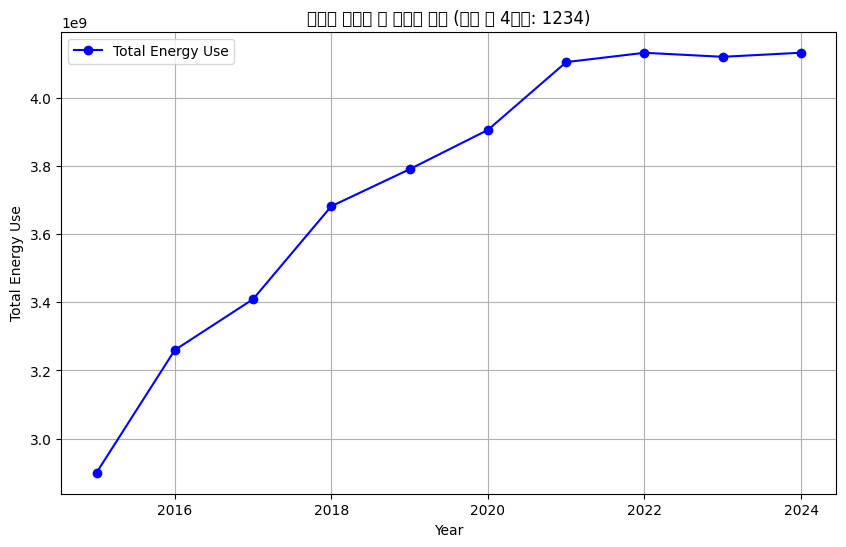

In [30]:
# object 타입을 숫자로 변환
cols = ['EUS', 'GUS', 'WUS', 'HUS']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')



# 총 사용량 계산
df['TOTAL'] = df['EUS'] + df['GUS'] + df['WUS'] + df['HUS']
# 연도별 총합 계산
annual_sum = df.groupby('YEAR', as_index=False)['TOTAL'].sum()
# 변화량 계산
annual_sum['CHANGE'] = annual_sum['TOTAL'].diff()
# 선 그래프 시각화
plt.figure(figsize=(10,6))
plt.plot(annual_sum['YEAR'], annual_sum['TOTAL'], marker='o', linestyle='-', color='blue', label='Total Energy Use')
plt.xlabel('Year')
plt.ylabel('Total Energy Use')
plt.title('연도별 에너지 총 사용량 변화 (학번 뒤 4자리: 1234)')
plt.legend()
plt.grid(True)

# y축 지수 표기
# 'sci'는 scientific notation, 즉 지수 표기법을 의미한다.
# scilimits=(0,0)
# 지수 표기법을 적용할 기준 범위를 의미한다.
# (m, n) 형태로 주어지며, 축 값의 지수가 m보다 크거나 n보다 작을 때만 지수 표기를 쓴다.
# (0,0)은 무조건 지수 표기로 표시하라는 뜻이다.
# 즉, 값의 크기와 상관없이 항상 10ⁿ 형태로 나타난다.
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# 그래프 저장
plt.savefig('energy_trend_1234.png', dpi=300)
plt.show()

/tmp/ipython-input-3937416599.py:30: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3937416599.py:30: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3937416599.py:30: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3937416599.py:30: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3937416599.py:30: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3937416599.py:30: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3937416599.py:30: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/t

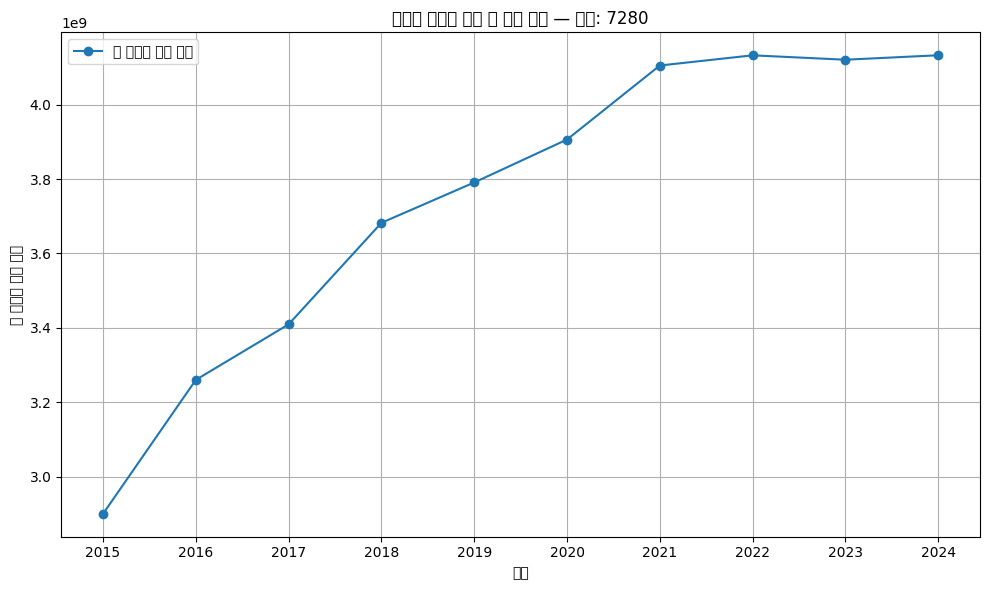

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

# 한글 폰트 설정 (Windows인 경우 예시)
mpl.rcParams['font.family'] = 'Malgun Gothic'   # 또는 'NanumGothic', 'NanumBarunGothic'
mpl.rcParams['axes.unicode_minus'] = False      # 마이너스 기호 깨짐 방지

# (이전 전처리 + 집계 코드가 이미 있다고 가정)

# 연도별 총액 데이터프레임 — 예:
# yearly = df.groupby('YEAR')['total_energy_cost'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly['YEAR'], yearly['total_energy_cost'], marker='o', linestyle='-',
         label='총 에너지 사용 금액')
plt.xlabel('연도')
plt.ylabel('총 에너지 사용 금액')

# 제목에 학번 포함
plt.title(f'연도별 에너지 사용 총 금액 변화 7280')

plt.grid(True)
plt.xticks(yearly['YEAR'])
plt.legend()

# (선택적으로 변화율 보조축 그리는 부분이 있다면 여기도 포함)
# ...

plt.tight_layout()
plt.show()


In [ ]:
import json
import pandas as pd

data = []

df = pd.DataFrame(data)
data = response.json()['energyUseDataSummaryInfo']



for item in items:
    for i in item:
        if i['MM_TYPE'] == '개인':
            print(i['YEAR'], i['MON'])
            data.append([i['YEAR'], i['MON'], i['EUS'], i['GUS'], i['WUS'], i['HUS']])

df = pd.DataFrame(data, columns=['YEAR', 'MON', 'EUS', 'GUS','WUS', 'HUS'])

In [14]:
import json
import pandas as pd

# response = requests.get(...) 등으로 응답 객체 얻는 부분이 있다고 가정

# JSON 파싱
resp_json = response.json()
# row 리스트 얻기
items = resp_json.get('energyUseDataSummaryInfo', {}).get('row', [])

data = []  # 결과 저장할 리스트

for i in items:
    # MM_TYPE이 '개인'인 경우만 선택
    if i.get('MM_TYPE') == '개인':
        # YEAR, MON, EUS 등 정보 출력 (디버그용)
        print(i.get('YEAR'), i.get('MON'))
        # append 할 때 필요한 값들을 리스트 형태로 추가
        data.append([
            i.get('YEAR'),
            i.get('MON'),
            i.get('EUS'),
            i.get('GUS'),
            i.get('WUS'),
            i.get('HUS')
        ])

# 결과가 있을 경우 DataFrame 생성
if data:
    df = pd.DataFrame(data, columns=['YEAR', 'MON', 'EUS', 'GUS', 'WUS', 'HUS'])
else:
    # 조건에 맞는 데이터 없을 때 빈 DF 혹은 경고 처리
    df = pd.DataFrame(columns=['YEAR', 'MON', 'EUS', 'GUS', 'WUS', 'HUS'])
    print("조건을 만족하는 데이터가 없습니다.")

# 확인용 출력
print(df)


AttributeError: 'ellipsis' object has no attribute 'json'